In [3]:
import numpy as np
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('test_box.png')

libpng warning: iCCP: known incorrect sRGB profile


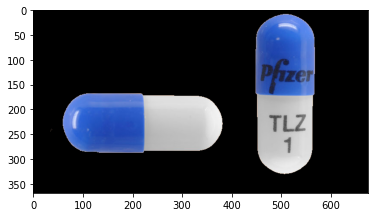

In [4]:
plt.imshow(image)

In [5]:
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
ret, imthres = cv2.threshold(imgray, 10, 255, cv2.THRESH_BINARY_INV)

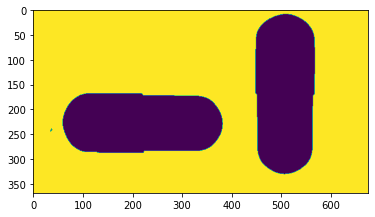

In [18]:
plt.imshow(imthres)

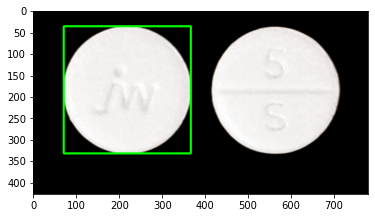

In [57]:
image = cv2.imread('test_box2.png')
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_OTSU)

# 컨튜어 찾기
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contr = contours[1]
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(image, [box], -1, (0,255,0), 3)
plt.imshow(image)


In [66]:
def crop_minAreaRect(img, rect):
    mult = 1.0
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    W = rect[1][0]
    H = rect[1][1]

    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]
    x1 = min(Xs)
    x2 = max(Xs)
    y1 = min(Ys)
    y2 = max(Ys)

    rotated = False
    angle = rect[2]

    if angle < -45:
        angle+=90
        rotated = True

    center = (int((x1+x2)/2), int((y1+y2)/2))
    size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
    cv2.circle(img, center, 10, (0,255,0), -1) #again this was mostly for debugging purposes

    M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

    cropped = cv2.getRectSubPix(img, size, center)    
    cropped = cv2.warpAffine(cropped, M, size)

    croppedW = W if not rotated else H 
    croppedH = H if not rotated else W

    croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
    return croppedRotated

In [67]:
image = cv2.imread('test_box.png')
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_OTSU)

# 컨튜어 찾기
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contr = contours[0]
rect = cv2.minAreaRect(contr)

In [68]:
crop0 = crop_minAreaRect(image, rect)

In [69]:
crop0.shape

(295, 295, 3)

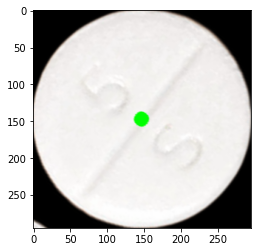

In [70]:
plt.imshow(crop0)